### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact
import warnings

In [2]:
df=pd.read_csv('soil and crops.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape 

(2200, 8)

In [4]:
#cleaning data
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### Data analysis

In [5]:
@interact
def compare(conditions=df.iloc[:,:-1]): #all conditions but not label
    print('Crops that require greater than avg ',conditions, ':\n')
    print(', '.join(df[df[conditions] > df[conditions].mean()]['label'].unique()))
    print('________________________________________________________________')
    print('Crops that require less than avg ',conditions, ':\n')
    print(', '.join(df[df[conditions] <= df[conditions].mean()]['label'].unique()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [6]:
cols=[]
cols=df.columns.values
print(cols)

['N' 'P' 'K' 'temperature' 'humidity' 'ph' 'rainfall' 'label']


### Understanding the data with visualizations

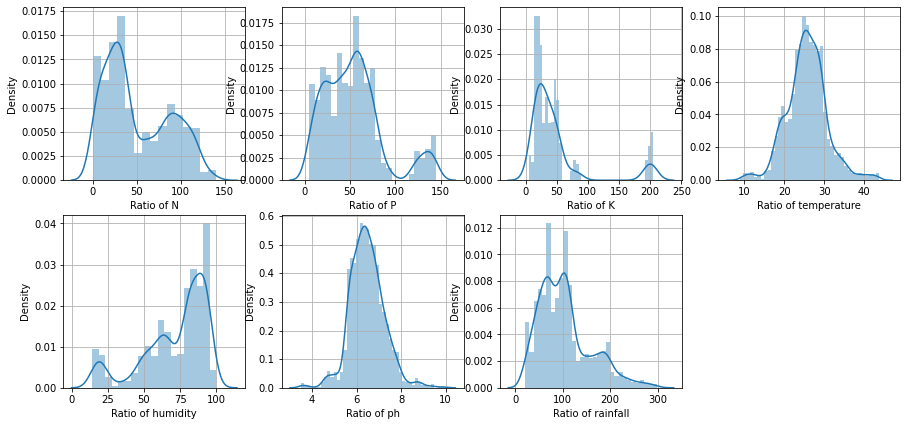

In [8]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,7)

for i in range(len(cols)-1):
    plt.subplot(2,4,i+1)
    sns.distplot(df[cols[i]])
    plt.xlabel('Ratio of '+cols[i])
    plt.grid()



In [9]:
print('Crops that require high Nitrogen:',', '.join(df[df['N']>120]['label'].unique()))
print('Crops that require high Phosphorous:',', '.join(df[df['P']>100]['label'].unique()))
print('Crops that require high Potassium:',', '.join(df[df['K']>200]['label'].unique()))

Crops that require high Nitrogen: cotton
Crops that require high Phosphorous: grapes, apple
Crops that require high Potassium: grapes, apple


In [10]:
print('Crops that require high rainfall:',', '.join(df[df['rainfall']>200]['label'].unique()))
print('Crops that require low temperature:',', '.join(df[df['temperature']<10]['label'].unique()))
print('Crops that require high temperature:',', '.join(df[df['temperature']>40]['label'].unique()))
print('Crops that require low humidity:',', '.join(df[df['humidity']<20]['label'].unique()))
print('Crops that require high humidity:',', '.join(df[df['humidity']>75]['label'].unique()))
print('Crops that require low pH:',', '.join(df[df['ph']<4]['label'].unique()))
print('Crops that require high pH:',', '.join(df[df['ph']>9]['label'].unique()))

Crops that require high rainfall: rice, papaya, coconut
Crops that require low temperature: grapes
Crops that require high temperature: grapes, papaya
Crops that require low humidity: chickpea, kidneybeans
Crops that require high humidity: rice, mungbean, pomegranate, banana, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute
Crops that require low pH: mothbeans
Crops that require high pH: mothbeans


### Crops suitable accroding to seasons

In [11]:

print('Summer crops:')
print(', '.join(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique()))

print('______________________________________________________')
print('Winter crops:')
print(', '.join(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique()))

print('______________________________________________________')
print('Rainy crops:')
print(', '.join(df[(df['rainfall']>200) & (df['humidity']>30)]['label'].unique()))

Summer crops:
pigeonpeas, mothbeans, blackgram, mango, grapes, orange, papaya
______________________________________________________
Winter crops:
maize, pigeonpeas, lentil, pomegranate, grapes, orange
______________________________________________________
Rainy crops:
rice, papaya, coconut


### K-means clustering to find out which crops can be grown rotationally

In [12]:
# warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

X=df.iloc[:,:-1]
X.head()
# X.shape

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


### Elbow method to determine the number of clusters


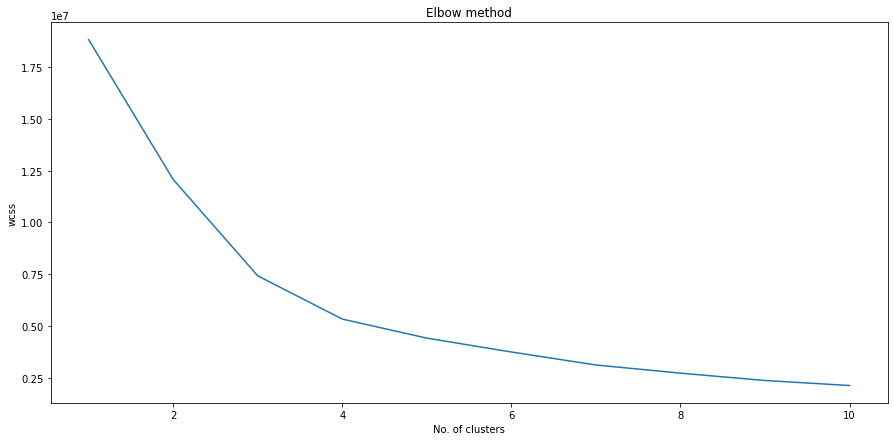

In [13]:

wcss=[]

for i in range(10):
    km=KMeans(n_clusters=i+1, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()
    
    

#### We take 4 clusters as that is the point of change in the graph

In [14]:
km=KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=km.fit_predict(X)

y=df['label']
y_kmeans=pd.DataFrame(y_kmeans)
z=pd.concat([y_kmeans,y],axis=1)
z=z.rename(columns={0: 'cluster'})
z

,cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice
...,...,...
2195,3,coffee
2196,1,coffee
2197,3,coffee
2198,1,coffee


In [15]:
print('Crops in Cluster 1:', ', '.join(z[z['cluster']==0]['label'].unique()))
print("____________________________________________________________________________")
print('Crops in Cluster 2:', ', '.join(z[z['cluster']==1]['label'].unique()))
print("____________________________________________________________________________")
print('Crops in Cluster 3:', ', '.join(z[z['cluster']==2]['label'].unique()))
print("____________________________________________________________________________")
print('Crops in Cluster 4:', ', '.join(z[z['cluster']==3]['label'].unique()))
print("____________________________________________________________________________")

Crops in Cluster 1: maize, chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, lentil, pomegranate, mango, orange, papaya, coconut
____________________________________________________________________________
Crops in Cluster 2: maize, banana, watermelon, muskmelon, papaya, cotton, coffee
____________________________________________________________________________
Crops in Cluster 3: grapes, apple
____________________________________________________________________________
Crops in Cluster 4: rice, pigeonpeas, papaya, coconut, jute, coffee
____________________________________________________________________________


In [125]:
# print(X.shape)
# print(y_test.shape)

### Prediction for which crops should be grown according to the conditions of the soil using logistic regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# y_pred.shape

In [18]:
from sklearn.metrics import classification_report

cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9681818181818181

#### The above model has an accuracy of 97%

In [113]:
pred=model.predict((np.array([[20,30,10,15,90,7.5,100]])))
pred

array(['orange'], dtype=object)